# Food Safety

Exploration of the [Food Standards Agency's Data](http://ratings.food.gov.uk/) for Glasgow Establishments.
The data for this analysis was downloaded using the code in ./data/data_download.ipynb

### Importing the library
"pd" is the common short name given to the pandas library

In [3]:
import pandas as pd

If looking for a deeper look at getting started in pandas, there is 2017 SciPy talk [here](https://github.com/chendaniely/scipy-2017-tutorial-pandas)

For a quick overview, I recommend the [Cheat Sheet](http://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

### Opening a Comma Separated Value file
The **read_csv** function can also handle most tipes of flat files (i.e. stuff you can read with your favourite notepad application) provided that correct parametres are passed. The method handels skipping rows, parsing dates from different columns, differnt encodings, zipped sources and more.

For the full documentation: [read_csv docs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)

In [4]:
df = pd.read_csv('data/food_safety_Glasgow.csv')

### Exploring the data
There are many ways to explore the data. Some of the simplest are:

```python
    df             # showing the "full" dataset
    df.shape       # checking the size of the dataset
    df.head(2)     # looking at first 2 rows. For last rows use df.tail()
    df.loc[639]    # grabbing a sample row (using index label) 
    df.iloc[639]   # grabbing a sample row (using integer-location index)
    df.columns     # looking at all column names
    df.info()      # summary non-nulls and types for each column
    df.describe()  # basic statistics (only for the numeric columns)
```

In [5]:
df.head()

FHRSID LocalAuthorityBusinessID                        BusinessName  \
0  1054130             18/00242/COM                                 #43   
1   946085             15/00071/COM  (DC1) Donut Coffee (Supreme Group)   
2    36328             10/00926/COM                      (Nisa) News 24   
3    19429             06/00508/COM                         (Starbucks)   
4    36363             10/01018/COM         1 Call Direct Staff Canteen   

              BusinessType  BusinessTypeID             AddressLine2  \
0  Restaurant/Cafe/Canteen               1  150 Old Dalmarnock Road   
1           Mobile caterer            7846       105 Clydeholm Road   
2        Retailers - other            4613         68 Gordon Street   
3  Restaurant/Cafe/Canteen               1          390 Provan Walk   
4  Restaurant/Cafe/Canteen               1   116 West Regent Street   

  AddressLine3 PostCode           RatingValue  \
0      Glasgow  G40 4LH   Awaiting Inspection   
1      Glasgow  G14 0QQ   Awaiting Inspection   
2      Glasgow   G1 3RS  Improvement Required   
3      Glasgow  G34 9DL                  Pass   
4      Glasgow   G2 2QD                  Pass   

                         RatingKey      ...       LocalAuthorityCode  \
0   fhis_awaiting_inspection_en-GB      ...                      776   
1   fhis_awaiting_inspection_en-GB      ...                      776   
2  fhis_improvement_required_en-GB      ...                      776   
3                  fhis_pass_en-GB      ...                      776   
4                  fhis_pass_en-GB      ...                      776   

   LocalAuthorityName      LocalAuthorityWebSite  LocalAuthorityEmailAddress  \
0        Glasgow City  http://www.glasgow.gov.uk  food.safety@glasgow.gov.uk   
1        Glasgow City  http://www.glasgow.gov.uk  food.safety@glasgow.gov.uk   
2        Glasgow City  http://www.glasgow.gov.uk  food.safety@glasgow.gov.uk   
3        Glasgow City  http://www.glasgow.gov.uk  food.safety@glasgow.gov.uk   
4        Glasgow City  http://www.glasgow.gov.uk  food.safety@glasgow.gov.uk   

  Scores  SchemeType NewRatingPending  Longitude   Latitude   AddressLine1  
0    NaN        FHIS            False  -4.219406  55.843804            NaN  
1    NaN        FHIS            False  -4.337705  55.870607            NaN  
2    NaN        FHIS            False  -4.257722  55.860794            NaN  
3    NaN        FHIS            False  -4.136909  55.872982            NaN  
4    NaN        FHIS            False  -4.258732  55.863606  Storey Ground  

[5 rows x 21 columns]

In [6]:
df.loc[639:642, ['BusinessName','Latitude']]

BusinessName   Latitude
639  Butterfly And The Pig (and Tea Room)  55.864192
640                    Butterfly Catering  55.798755
641                     Butterfly Nursery  55.804968
642              Buttons And Bows Nursery  55.843210

Where did all the other columns go? They are non-numeric :(

### Let's do some plotting
pandas uses matplotlib in the backend to give useful plot with one or few lines of code leaving the user with the possiblity to use pure matplotlib for more customized stuff.

For more info on [pandas visualization, go here.](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

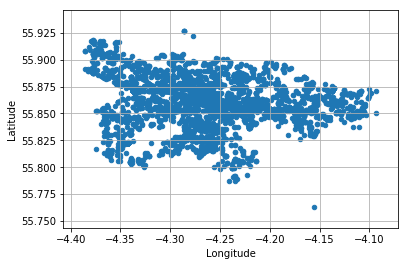

In [10]:
# uncomment to visualize matplotlib plots in the notebook (only need to run it once per notebook... usually with the imports)
%matplotlib inline  

df.plot('Longitude', 'Latitude', kind='scatter', grid=True)

In [8]:
df[df.Longitude>0]

FHRSID LocalAuthorityBusinessID BusinessName             BusinessType  \
93  905249             16/00516/COM    Al Sultan  Restaurant/Cafe/Canteen   

    BusinessTypeID      AddressLine2 AddressLine3 PostCode RatingValue  \
93               1  61 Bridge Street      Glasgow      NaN        Pass   

          RatingKey      ...      LocalAuthorityCode  LocalAuthorityName  \
93  fhis_pass_en-GB      ...                     776        Glasgow City   

        LocalAuthorityWebSite  LocalAuthorityEmailAddress Scores  SchemeType  \
93  http://www.glasgow.gov.uk  food.safety@glasgow.gov.uk    NaN        FHIS   

   NewRatingPending  Longitude   Latitude  AddressLine1  
93            False    0.11797  52.208875  Storey 1 - 3  

[1 rows x 21 columns]

In [9]:
# From a quick google maps search: 61 Bridge St, Glasgow G5 9JB  => 55.853033, -4.258319
df.loc[93, 'Longitude'] = -4.258319
df.loc[93, 'Latitude'] = 55.853033

In [11]:
is_missing_lat = pd.isnull(df.Latitude)
df = df[~is_missing_lat]

### Want more fancy plotting?

In [12]:
import folium
from folium.plugins import HeatMap

In [14]:
m = folium.Map(
    location=[55.863823, -4.267681],
    zoom_start=12,
    tiles='cartodbpositron'
)

rating_color={
    'fhis_awaiting_inspection_en-GB': 'gray',
    'fhis_improvement_required_en-GB': 'red',
    'fhis_pass_en-GB': 'yellow',
    'fhis_pass_and_eat_safe_en-GB': 'green',
}

for _, row in df.iterrows():   
    info_txt = "<b>{}</b><br>(<i>{}</i>, {})".format(row.BusinessName.replace("'", "`"), row.RatingValue, row.RatingDate)
    folium.Circle(
        radius=5,
        location=[row.Latitude, row.Longitude],
        tooltip=info_txt,
        color='black',
        weight=0.5,
        fill_opacity=0.8,
        fill_color=rating_color[row.RatingKey],
        fill=True,
    ).add_to(m)
    
m   # FYI: for some reason this one is rendered only on Firefox

### Let's bring some heat

In [15]:
m = folium.Map(
    location=[55.863823, -4.267681],
    zoom_start=12,
    tiles='cartodbpositron'
)

data_needing_improvements = df.loc[df.RatingValue == 'Improvement Required', ['Latitude', 'Longitude']].values
data_pass_plus = df.loc[df.RatingValue == 'Pass and Eat Safe', ['Latitude', 'Longitude']].values

HeatMap(data=data_needing_improvements, name='need_improvements', show=False).add_to(m)
HeatMap(data=data_pass_plus, name='pass_plus', show=False).add_to(m)
folium.LayerControl().add_to(m)

m

## Combining data

#### Yelp data
I've downloaded and matched businesses based on location and name and saved only the matches with good enough confidence to the yelp_matched.csv file. The data has been augumented with the FHRSID of the corresponding matches.

In [16]:
df_yelp_matched = pd.read_csv('data/yelp_matched.csv')
df_yelp_matched.head()

name  rating  review_count price   latitude  longitude  \
0          Papa Gills     3.5             4   NaN  55.888286  -4.378524   
1    Kismet Carry Out     3.5             2     £  55.908425  -4.386131   
2   Remo's Fast Foods     4.0             1   NaN  55.814365  -4.360539   
3  Traceys Fast Foods     1.0             1   NaN  55.814439  -4.360600   
4           Cafe Asia     5.0             4    ££  55.821804  -4.361971   

  zip_code                      id                  address1  FHRSID  
0  G14 0QL  q914R_1SiZCts3EcI0Fvqw  2372-2376 Dumbarton Road   95732  
1  G15 8PA  muS22WQaPD6ZPCR1w1Kgvg      311 Drumry Road East   95353  
2  G53 7BL  R1RDz9hLwHr6UzdRufZqdg         339 Nitshill Road  123482  
3  G53 7BL  NjrfSj87AUhNggBPgWHGCw         327 Nitshill Road   18661  
4  G53 7DA  xZrD0xkg9QqgTQQqNRqkgQ        1357 Barrhead Road  406756

In [91]:
# most yelp rated business
df_yelp_matched.sort_values('review_count', ascending=False).head(3)

name  rating  review_count price   latitude  \
446  The Butterfly and the Pig     4.5           177    ££  55.864196   
447          Bread Meats Bread     4.0           154    ££  55.861564   
226            Ubiquitous Chip     4.5           127   £££  55.874915   

     longitude zip_code                      id               address1  FHRSID  
446  -4.260933   G2 4SQ  pnSROB18JmOIOi3Nmaih5w        153 Bath Street   26236  
447  -4.256361   G2 5UB  3iUvNCibzS22lKUsGcalWA  104 St Vincent Street  607032  
226  -4.293247  G12 8SJ  rmaH1My396rCYEnL8XQtPg       8-12 Ashton Lane   56097

In [96]:
# highest rated businesses
df_yelp_matched \
    .sort_values(['rating', 'review_count'], ascending=False) \
    .head()

name  rating  review_count price   latitude  longitude  \
180   Two Fat Ladies     5.0            15   £££  55.870244  -4.298026   
425  Sapori d'Italia     5.0            14    ££  55.827461  -4.259119   
469         Al Dente     5.0            13    ££  55.855241  -4.250354   
54        Wee Lochan     5.0            11   £££  55.878009  -4.322210   
129      111 By Nico     5.0            10   £££  55.888143  -4.306677   

    zip_code                      id              address1  FHRSID  
180  G11 6NX  njqKz-SdhsJt1eOV26APcg     88 Dumbarton Road   95672  
425  G42 9XJ  xvpPvfe8tiiTVh_RSsvz2A    1021 Cathcart Road  984737  
469   G1 4LW  ANyZ9smpiu2nxn5S2rCmTw  120 Stockwell Street   46639  
54   G11 7HT  2bgGFTdklZkqx_kes_y7fQ         340 Crow Road  448778  
129  G12 0JU  mVUrtt-CmLSF89Rdl1Zntg     111 Cleveden Road   49192

#### Merging data on the FHRSID

In [97]:
df_combined = pd.merge(left=df, right=df_yelp_matched, on='FHRSID', how='inner')
df_combined.head()

FHRSID LocalAuthorityBusinessID     BusinessName             BusinessType  \
0  772027             15/00388/COM         1051 GWR  Restaurant/Cafe/Canteen   
1   49192             11/01114/COM      111 By Nico  Restaurant/Cafe/Canteen   
2   36362             10/01017/COM             2 Go  Restaurant/Cafe/Canteen   
3   95689         28650/0279/0/000  279 Cafe Bistro  Restaurant/Cafe/Canteen   
4  581121             13/00703/COM    393 Caffe Bar   Takeaway/sandwich shop   

   BusinessTypeID             AddressLine2 AddressLine3 PostCode RatingValue  \
0               1  1051 Great Western Road      Glasgow  G12 0XP        Pass   
1               1        109 Cleveden Road      Glasgow  G12 0JU        Pass   
2               1       397 Dumbarton Road      Glasgow  G11 6BE        Pass   
3               1       279 Dumbarton Road      Glasgow  G11 6AB        Pass   
4            7844     393 Alexandra Parade      Glasgow  G31 3AD        Pass   

         RatingKey          ...          AddressLine1             name rating  \
0  fhis_pass_en-GB          ...                   NaN         1051 GWR    3.0   
1  fhis_pass_en-GB          ...                   NaN      111 By Nico    5.0   
2  fhis_pass_en-GB          ...                   NaN        2 Go Cafe    4.0   
3  fhis_pass_en-GB          ...                   NaN  279 Cafe Bistro    4.5   
4  fhis_pass_en-GB          ...                   NaN    Caffe 393 Bar    3.0   

  review_count price   latitude longitude  zip_code                      id  \
0            5    ££  55.884459 -4.310921   G12 0XP  VSc4gdSzCV7fw9QRG2xxeQ   
1           10   £££  55.888143 -4.306677   G12 0JU  mVUrtt-CmLSF89Rdl1Zntg   
2            1   NaN  55.870858 -4.308519   G11 6BE  kKzLEkrNG2EsLNIM2pb_XA   
3            3    ££  55.870810 -4.304700   G11 6AB  97DcB_MBs_jBi6omJR8TGA   
4            1   NaN  55.864477 -4.222797       G31  ARY2rVUaxkjoAjEEO3Tkag   

               address1  
0  1051 Gt Western Road  
1     111 Cleveden Road  
2    391 Dumbarton Road  
3    279 Dumbarton Road  
4  393 Alexandra Parade  

[5 rows x 30 columns]

In [18]:
df_combined.iloc[0]

FHRSID                                            772027
LocalAuthorityBusinessID                    15/00388/COM
BusinessName                                    1051 GWR
BusinessType                     Restaurant/Cafe/Canteen
BusinessTypeID                                         1
AddressLine2                     1051 Great Western Road
AddressLine3                                     Glasgow
PostCode                                         G12 0XP
RatingValue                                         Pass
RatingKey                                fhis_pass_en-GB
RatingDate                                    2018-02-21
LocalAuthorityCode                                   776
LocalAuthorityName                          Glasgow City
LocalAuthorityWebSite          http://www.glasgow.gov.uk
LocalAuthorityEmailAddress    food.safety@glasgow.gov.uk
Scores                                               NaN
SchemeType                                          FHIS
NewRatingPending               

In [45]:
qdf = df_combined[['rating', 'review_count']].copy()

qdf['price'] = df_combined['price'].fillna('').apply(len).replace(0, pd.np.nan)

fsa_rating_order = ['Improvement Required', 'Awaiting Inspection', 'Pass', 'Pass and Eat Safe']
qdf['fsa_rating'] = df_combined['RatingValue'].apply(
    fsa_rating_order.index
)

qdf.head()

rating  review_count  price  fsa_rating
0     3.0             5    2.0           2
1     5.0            10    3.0           2
2     4.0             1    NaN           2
3     4.5             3    2.0           2
4     3.0             1    NaN           2

In [54]:
# let's filter out for too little reviews
min_review = 3
is_rating_valid = qdf['review_count'] > min_review

compare = qdf[is_rating_valid].groupby('fsa_rating')['rating'].agg({'mean', 'std'})
compare.index = fsa_rating_order
compare


std      mean
Improvement Required  0.653227  3.858491
Awaiting Inspection   0.700649  3.909091
Pass                  0.621594  3.830645
Pass and Eat Safe     0.362506  3.884615

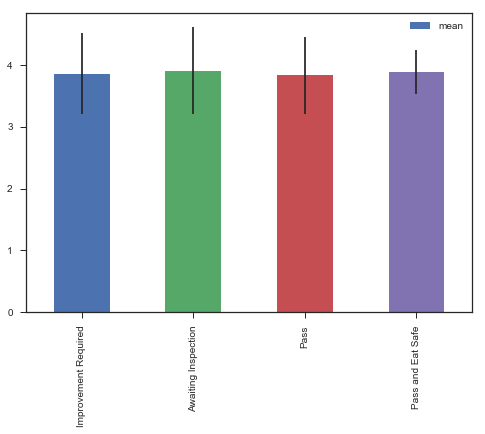

In [55]:
compare.plot.bar(y='mean', yerr='std')

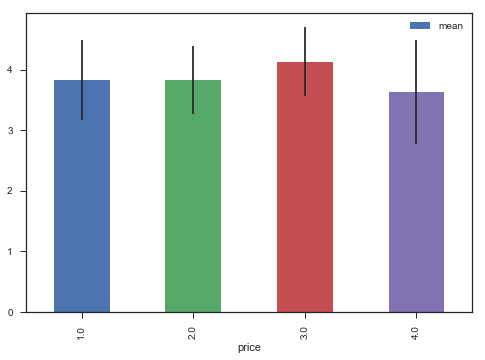

In [62]:
# What about price vs rating?
compare = qdf[is_rating_valid]\
            .dropna(subset=['price'])\
            .groupby('price')['rating']\
            .agg({'mean', 'std'})

compare.plot.bar(y='mean', yerr='std')

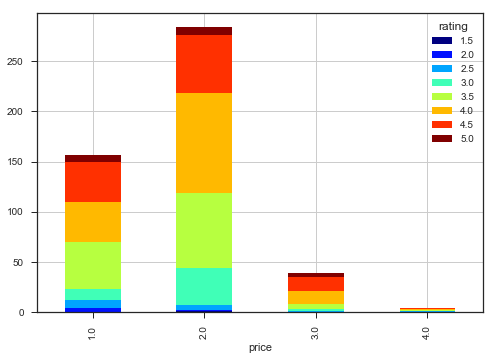

In [84]:
qdf[is_rating_valid]\
    .dropna(subset=['price'])\
    .groupby(['price', 'rating'])\
    .count()\
    .unstack(1)\
    .fillna(0)\
    ['review_count'].plot(kind='bar', stacked=True, grid=True, cmap='jet')